In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

- job_id : identificador uniqco para cada puesto de trabajo
- job_title : Título estandarizado del trabajo
- salary_usd : salario anual en dolares
- salary_currency : divisa original del salario
- experience_level : EN (Entry), Mi (Mid), SE (Senior), EX (Ejecutivo)
- employment_type: Tipo de trabajo donde FT (Full-time), PT(Part-time), CT(Contract), FL (Freelance)
- company_location : pais donde se localiza la compañia
- company_size : tamaño de la compañia según empleados. S (<50), M (50-250), L (>250)
- employee_residence : país de residencia del trabajador
- remote_ratio: 0 (no remoto), 50 (Hybrido), 100 (totalmente remoto)
- required_skills : top 5 habilidades requeridas
- education_required: Minimo de formación requerida
- year_experience: años de experiencia requeridos
- industry: sector industrial de la compañia
- posting_date : fecha de apertura del puesto de trabajo
- application_deadline: fecha límite de aplicación al puesto de trabajo
- job_description_length: total de caracteres en la descripción del trabajo
- benefits_score : puntuación numérica sobre el paquete de beneficios de la oferta de trabajo


In [3]:
df = pd.read_csv('ai_job_dataset.csv')
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
import tool_box as tb 

tb.describe_df(df)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
DATA_TYPE,object,object,int64,object,object,object,object,object,object,int64,object,object,int64,object,object,object,int64,float64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,15000,20,14315,3,4,4,20,3,20,3,13663,4,20,15,486,543,2000,51,16
CARDIN (%),100.0,0.13,95.43,0.02,0.03,0.03,0.13,0.02,0.13,0.02,91.09,0.03,0.13,0.1,3.24,3.62,13.33,0.34,0.11


In [6]:
df.salary_currency.value_counts()

salary_currency
USD    11957
EUR     2314
GBP      729
Name: count, dtype: int64

- Descartamos las columnas job_id, employee_residence, required skills, posting_date, application_deadline y company_name

<Axes: xlabel='salary_usd', ylabel='Count'>

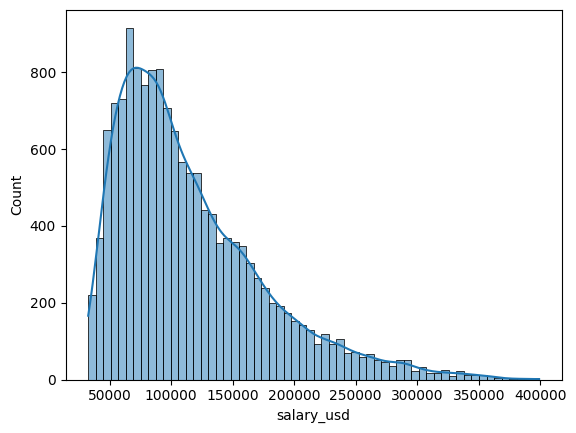

In [7]:

sns.histplot(data = df.salary_usd, log_scale=False, kde=True)

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
print(train_set.shape)
print(test_set.shape)

(12000, 19)
(3000, 19)


In [10]:
train_set.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
9839,AI09840,Principal Data Scientist,96731,GBP,MI,FL,United Kingdom,L,Germany,0,"Azure, Docker, Statistics, Hadoop",Bachelor,2,Transportation,2024-07-19,2024-09-30,1614,6.9,Quantum Computing Inc
9680,AI09681,AI Software Engineer,75146,USD,SE,PT,Austria,S,Austria,0,"SQL, GCP, Tableau",Master,5,Consulting,2024-12-26,2025-02-21,1277,6.3,DataVision Ltd
7093,AI07094,AI Research Scientist,39309,USD,EN,CT,Ireland,M,Netherlands,0,"SQL, R, GCP, MLOps, Computer Vision",Master,0,Government,2025-02-27,2025-03-23,1348,9.7,TechCorp Inc
11293,AI11294,NLP Engineer,83948,USD,SE,FT,China,L,China,50,"Scala, GCP, Python, MLOps, Deep Learning",Bachelor,5,Gaming,2024-11-19,2024-12-21,1692,5.4,Future Systems
820,AI00821,AI Specialist,135830,USD,EX,CT,Austria,M,United Kingdom,0,"Hadoop, Data Visualization, AWS, Computer Vision",Associate,17,Telecommunications,2025-03-24,2025-04-23,1987,7.8,Advanced Robotics


In [81]:
train_set.job_title.value_counts()

job_title
Machine Learning Researcher    648
AI Software Engineer           638
Autonomous Systems Engineer    628
Robotics Engineer              624
NLP Engineer                   614
Data Analyst                   613
Machine Learning Engineer      610
AI Architect                   609
AI Research Scientist          607
Head of AI                     604
Principal Data Scientist       601
Data Engineer                  588
Deep Learning Engineer         587
AI Product Manager             586
Research Scientist             586
AI Specialist                  584
Computer Vision Engineer       579
ML Ops Engineer                575
AI Consultant                  562
Data Scientist                 557
Name: count, dtype: int64

- Estudio variables numéricas

In [11]:
feat_num = train_set.describe().columns.to_list()
feat_num

['salary_usd',
 'remote_ratio',
 'years_experience',
 'job_description_length',
 'benefits_score']

In [12]:
target = 'salary_usd'

In [13]:
train_set[feat_num].describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,115164.424333,49.204167,6.205167,1503.306583,7.495658
std,60226.725267,40.780472,5.517724,574.550793,1.446003
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70089.250000,0.000000,2.000000,1006.750000,6.200000
50%,99644.500000,50.000000,4.000000,1512.000000,7.500000
75%,145921.250000,100.000000,9.000000,1996.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


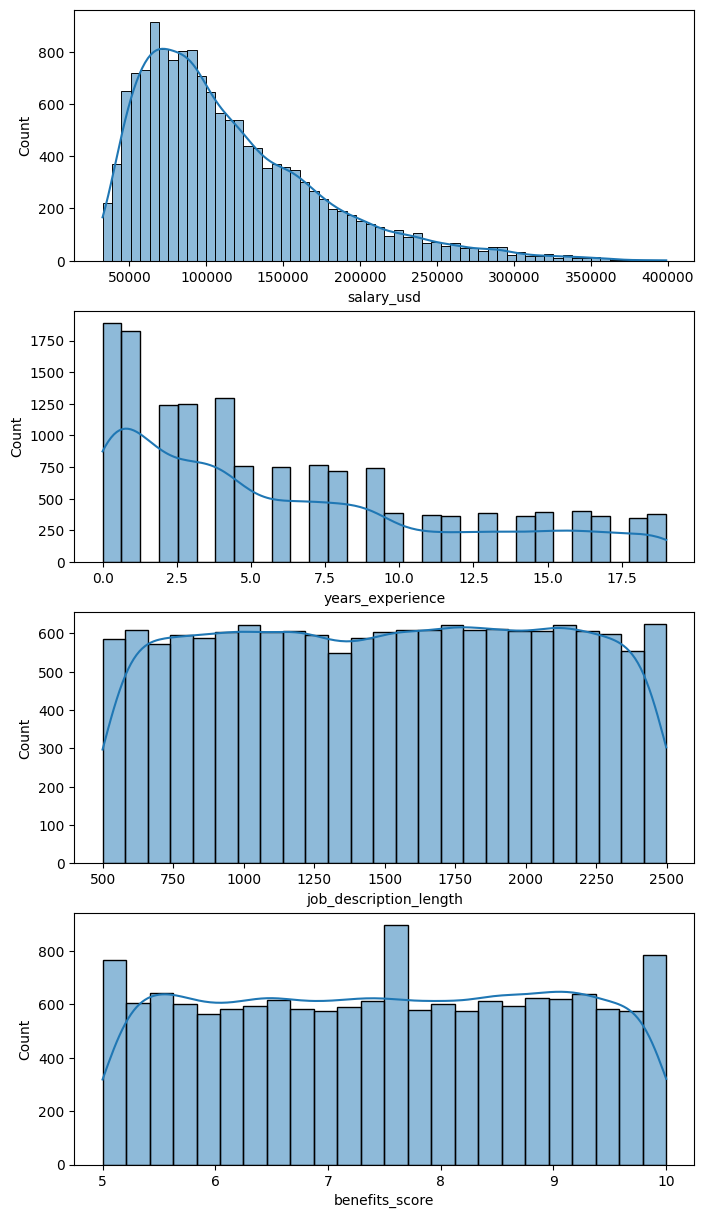

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8,15))
n = 0
for col in feat_num:
    if col != 'remote_ratio':
        sns.histplot(data = df[col], log_scale=False, kde=True, ax=axs[n])
        n+=1

In [15]:
feat_num
corr = train_set[feat_num].corr()
serie = np.abs(corr[target]).sort_values(ascending = False)
serie

salary_usd                1.000000
years_experience          0.735575
job_description_length    0.014882
remote_ratio              0.013275
benefits_score            0.000424
Name: salary_usd, dtype: float64

- De manera visual ya se podia intuir que tanto benefits_score como job_description_length por esa distribución uniforme no tenian pinta de discriminar, cosa que la correlación nos confirma ya que obtienen valores de correlacion menor al 1% por lo que estas dos variables se van a descartar. Remote_ratio es categorica por lo que hay que transformarla y realizar ANOVA

- Nos quedamos con years_experience que vamos a tratar como numérica discreta

<Axes: xlabel='years_experience', ylabel='salary_usd'>

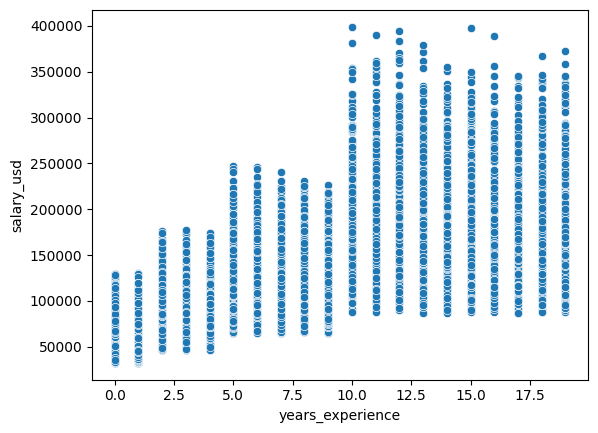

In [16]:
sns.scatterplot(y = target, x='years_experience', data = train_set)

In [17]:
train_set.groupby('years_experience')[target].mean()

years_experience
0      63250.755541
1      63292.847469
2      88515.424726
3      87138.007984
4      87893.833170
5     121665.162866
6     124846.487644
7     120252.176090
8     124566.391681
9     121518.030822
10    190847.755627
11    186836.019481
12    194261.897887
13    192368.189369
14    185693.178082
15    184313.113846
16    180102.891374
17    184043.153061
18    188834.194656
19    190109.290657
Name: salary_usd, dtype: float64

Empecemos a valorar variables categóricas con valores unicos altos que puedan revelar información relevante y vemos como tratarlas.

Título de puesto de trabajo

In [18]:
train_set.groupby('job_title')['salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Architect,609.0,116283.591133,60568.695040,33220.0,72782.00,100069.0,146369.00,398084.0
AI Consultant,562.0,113399.354093,54470.745973,33959.0,73337.50,100727.0,144740.75,325757.0
AI Product Manager,586.0,115039.856655,59521.061056,35078.0,69080.50,101426.5,149155.75,381575.0
AI Research Scientist,607.0,115961.787479,63323.091166,33092.0,69253.50,100036.0,145952.00,394917.0
AI Software Engineer,638.0,114415.181818,59239.173866,33013.0,69526.50,98200.0,148173.00,379418.0
AI Specialist,584.0,118872.756849,64936.399205,34174.0,69896.25,102078.0,155122.25,390292.0
Autonomous Systems Engineer,628.0,111099.136943,56231.042511,32790.0,68832.75,95250.5,140400.25,364585.0
Computer Vision Engineer,579.0,114903.576857,59129.534139,32519.0,72633.50,98626.0,141930.00,366957.0
Data Analyst,613.0,111636.619902,57677.240834,32542.0,70615.00,95941.0,139082.00,361541.0


-  Curiosamente cada uno de los trabajos del dataset tienen valores numéricos descriptivos muy similares lo que indica que no va a haber discriminación según el tipo de trabajo con respecto al salario. Veamos igualmente su correlacioón con un ANOVA para confirmar estadísticamente la relación.

In [19]:
from scipy import stats

valores_unicos = train_set['job_title'].unique()
trabajo_salario = [train_set[train_set['job_title'] == categoria][target] for categoria in valores_unicos]

f_val, p_val = stats.f_oneway(*trabajo_salario)

print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 0.9211870714873572
Valor p: 0.5558856089275284


- Afirmativamente, con un p-valor de 0,5 supera con creces el umbral de significancia de 0.05 por lo que es una varible que hay que descartar.

Localización de la compañía

In [20]:
valores_unicos = train_set['company_location'].unique()
compañia_salario = [train_set[train_set['company_location'] == categoria][target] for categoria in valores_unicos]

f_val, p_val = stats.f_oneway(*compañia_salario)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 176.50062529868111
Valor p: 0.0


- Estadísticamente podemos asegurar que hay relación de significancia para cada uno de las localizaciones con respecto al salario. Nos la quedamos. Le haremos un OneHot Encoding

Tipo de industria o sector

In [21]:
valores_unicos = train_set['industry'].unique()
industria_salario = [train_set[train_set['industry'] == categoria][target] for categoria in valores_unicos]

f_val, p_val = stats.f_oneway(*industria_salario)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.6771650839731651
Valor p: 0.7990386106805354


- El tipo de industria no parece sesgar información. Con un p-valor de 0,79 rechazamos hipotesis alternativa de que haya diferencias significativas para cada una de las industrias o grupos con respecto al salario.


Es momento de transformar las categoricas con valores únicos bajos

In [22]:
train_set.employment_type.value_counts()

employment_type
FT    3039
FL    3017
CT    2975
PT    2969
Name: count, dtype: int64

In [23]:
dic_el = {'EN':0, 'MI': 1, 'SE':2, 'EX':3}  # orden justificado según experiencia laboral
dic_cs = {'S': 0, 'M': 1, 'L':2} # orden según el tamaño de la compañia, de menos trabajadores a más.
dic_rr = {0 : 0, 50: 1, 100:2}  # orden según si es totalmente presencial o si es 100% en remoto. La mitad es hibrido
dic_er = {'Associate' : 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3} # orden establecido según escala de formación
dic_sc = {'USD' : 0, 'EUR': 1, 'GBP': 2} # orden establecido según la fuerza relativa de la moneda, siendo el dolar más débil y la libra más fuerte

train_set['experiencia'] = train_set.experience_level.map(dic_el)
train_set['tamaño_compañia'] = train_set.company_size.map(dic_cs)
train_set['modalidad'] = train_set.remote_ratio.map(dic_rr)
train_set['formacion_min'] = train_set.education_required.map(dic_er)
train_set['tipo_moneda'] = train_set.salary_currency.map(dic_sc)

In [24]:
test_set['experiencia'] = test_set.experience_level.map(dic_el)
test_set['tamaño_compañia'] = test_set.company_size.map(dic_cs)
test_set['modalidad'] = test_set.remote_ratio.map(dic_rr)
test_set['formacion_min'] = test_set.education_required.map(dic_er)
test_set['tipo_moneda'] = test_set.salary_currency.map(dic_sc)

In [25]:
feat_cat = ['experiencia', 'tamaño_compañia', 'modalidad', 'formacion_min', 'tipo_moneda']
feat_num = ['years_experience']

- Transformo la columna tipo de empleo en tres columnas. La primera con media jornada y jornada completa. La segunda y tercera columnas son binarias respecto a Autónomo y Contrato temporal

In [26]:
train_set['jornada'] = 0
train_set.loc[train_set['employment_type'] == 'PT', 'jornada'] = 1  #media jornada
train_set.loc[train_set['employment_type'] == 'FT', 'jornada'] = 2  # jornada completa

In [27]:
test_set['jornada'] = 0
test_set.loc[test_set['employment_type'] == 'PT', 'jornada'] = 1  
test_set.loc[test_set['employment_type'] == 'FT', 'jornada'] = 2 

In [28]:
train_set['Autonomo'] = (train_set['employment_type'] == 'FL').astype(int)
test_set['Autonomo'] = (test_set['employment_type'] == 'FL').astype(int)

In [29]:
train_set['Contrato_temporal'] = (train_set['employment_type'] == 'CT').astype(int)
test_set['Contrato_temporal'] = (test_set['employment_type'] == 'CT').astype(int)

In [30]:
feat_cat.append('Contrato_temporal')
feat_cat.append('Autonomo')
feat_cat.append('jornada')

Veamos las distribuciones por separado de cada categorica

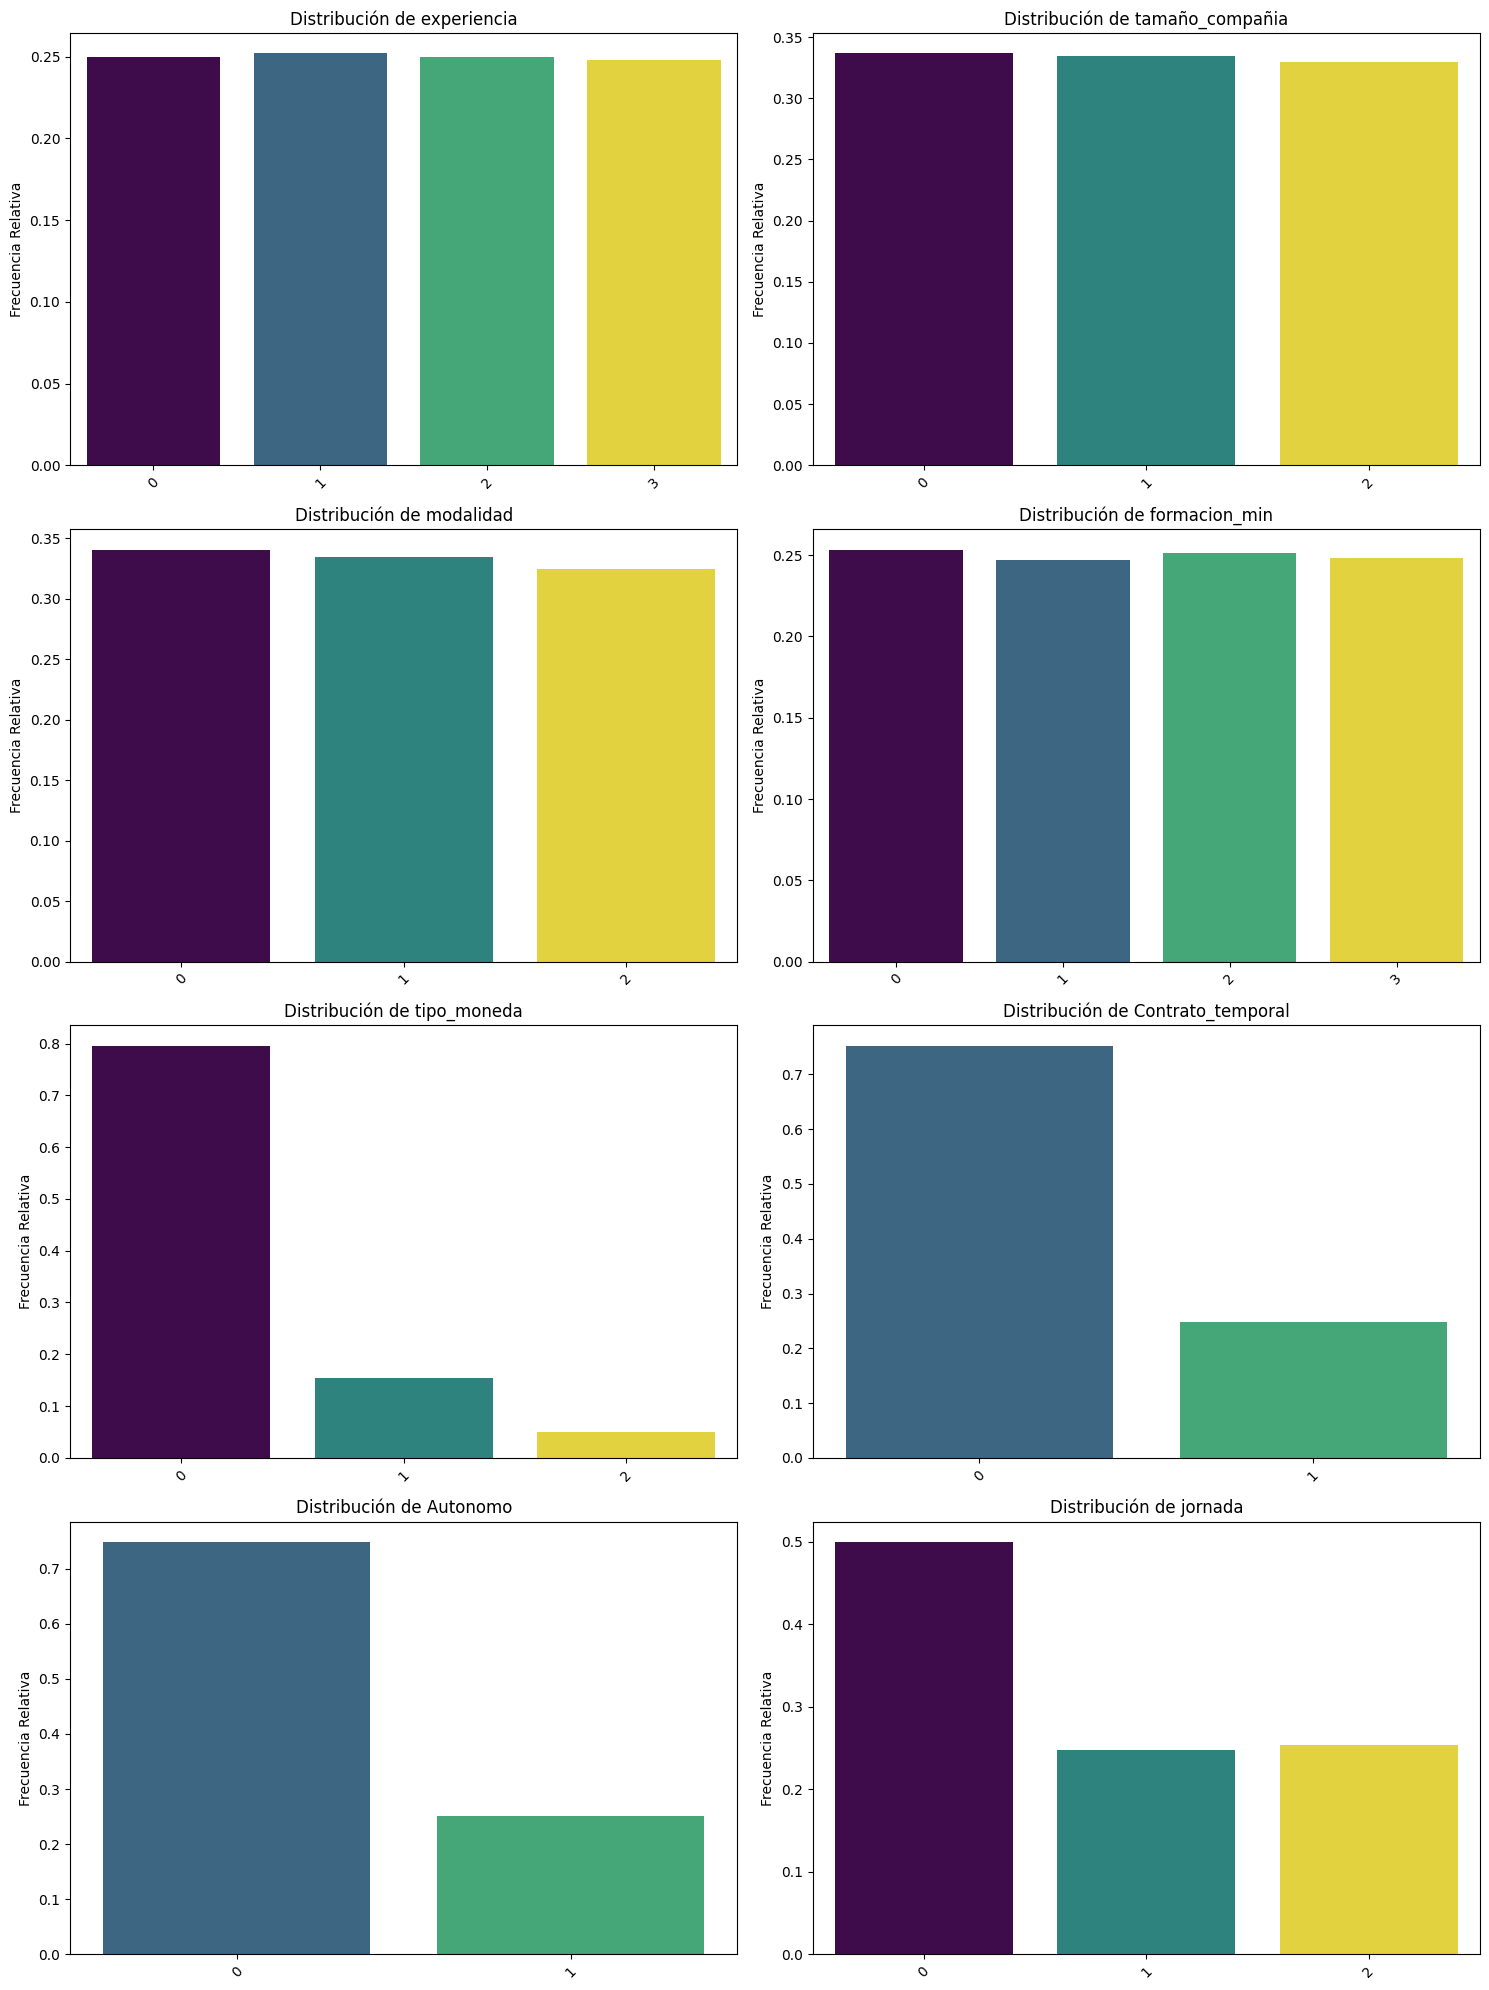

In [31]:
import bootcampviztools as btc

btc.pinta_distribucion_categoricas(train_set, feat_cat, relativa=True)

Veamos la distribución comparada con respecto a la variable target

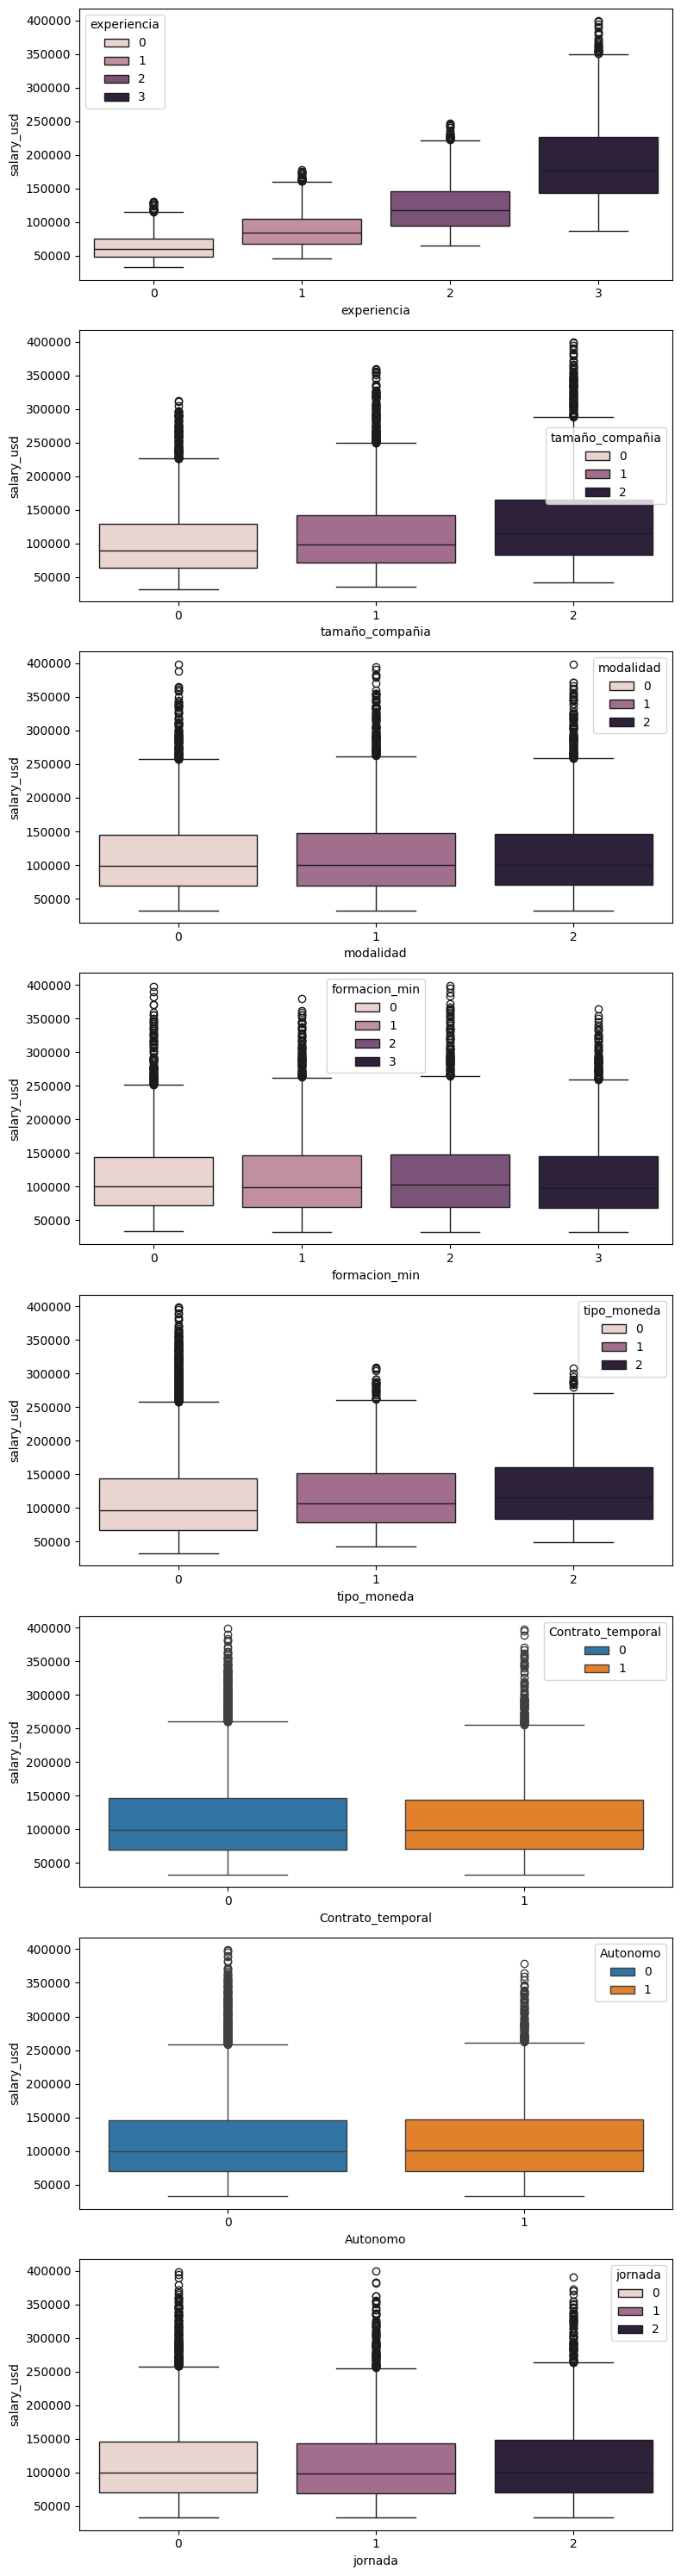

In [32]:
fig, axs = plt.subplots(nrows=len(feat_cat), ncols=1, figsize=(8,30))
n = 0
for col in feat_cat:
    sns.boxplot(x = col,
                y = target,
                hue = col,
                data=train_set,
                ax=axs[n])
    n +=1
plt.tick_params(axis='x', rotation=0)
plt.tight_layout()


Confirmemos la parte visual con un ANOVA

In [33]:


for col in feat_cat:
        valores_unicos = train_set[col].unique()
        col_salario = [train_set[train_set[col] == categoria][target] for categoria in valores_unicos]
        f_val, p_val = stats.f_oneway(*col_salario)

        print(f"La relación de {col} con {target} tiene valor F:", f_val, "Valor p:", p_val)

La relación de experiencia con salary_usd tiene valor F: 6011.471489008899 Valor p: 0.0
La relación de tamaño_compañia con salary_usd tiene valor F: 252.28565232439556 Valor p: 4.733444413550363e-108
La relación de modalidad con salary_usd tiene valor F: 1.737322168281537 Valor p: 0.17603531865025565
La relación de formacion_min con salary_usd tiene valor F: 2.161926808042474 Valor p: 0.09028381378145253
La relación de tipo_moneda con salary_usd tiene valor F: 28.34935190932189 Valor p: 5.212369428707529e-13
La relación de Contrato_temporal con salary_usd tiene valor F: 0.07382086375183232 Valor p: 0.7858574131815689
La relación de Autonomo con salary_usd tiene valor F: 0.00034000762121062897 Valor p: 0.9852887110162726
La relación de jornada con salary_usd tiene valor F: 1.773852957803498 Valor p: 0.1697224656384192


- Nos vamos a quedar con las siguientes: 'experiencia', 'tamaño_compañia', 'tipo_moneda', y  a 'formacion_min' le vamos a dar una oportunidad para comparar con dos listas los modelos.

In [34]:
feat_sel_1 = ['years_experience', 'experiencia', 'tamaño_compañia', 'tipo_moneda']
feat_sel_2 = ['years_experience', 'experiencia', 'tamaño_compañia', 'tipo_moneda','formacion_min']

In [35]:
train_set = pd.get_dummies(train_set, columns=['company_location'], dtype = int)


In [36]:
test_set = pd.get_dummies(test_set, columns=['company_location'], dtype = int)

In [37]:
feat_sel_1.extend(x for x in train_set.columns if x.startswith('company'))
feat_sel_2.extend(x for x in train_set.columns if x.startswith('company'))


In [38]:
feat_sel_1.remove('company_size')
feat_sel_1.remove('company_name')
feat_sel_2.remove('company_size')
feat_sel_2.remove('company_name')

In [59]:
print(len(feat_sel_1))

24


In [40]:
feat_sel_all = feat_cat.copy()
feat_sel_all.extend(x for x in train_set.columns if x.startswith('company'))
feat_sel_all

['experiencia',
 'tamaño_compañia',
 'modalidad',
 'formacion_min',
 'tipo_moneda',
 'Contrato_temporal',
 'Autonomo',
 'jornada',
 'company_size',
 'company_name',
 'company_location_Australia',
 'company_location_Austria',
 'company_location_Canada',
 'company_location_China',
 'company_location_Denmark',
 'company_location_Finland',
 'company_location_France',
 'company_location_Germany',
 'company_location_India',
 'company_location_Ireland',
 'company_location_Israel',
 'company_location_Japan',
 'company_location_Netherlands',
 'company_location_Norway',
 'company_location_Singapore',
 'company_location_South Korea',
 'company_location_Sweden',
 'company_location_Switzerland',
 'company_location_United Kingdom',
 'company_location_United States']

In [41]:
feat_sel_all.remove('company_size')
feat_sel_all.remove('company_name')

In [42]:
feat_sel_all.append('years_experience')

In [60]:
len(feat_sel_all)

29

<Axes: >

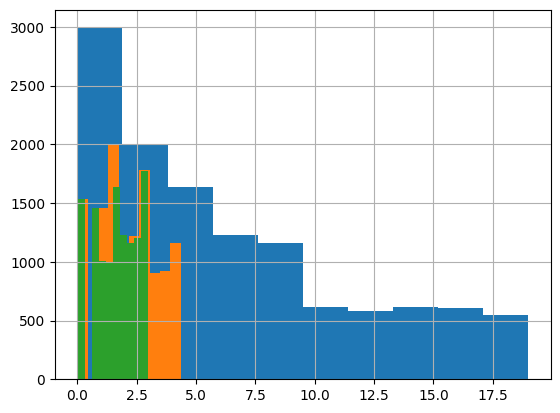

In [43]:
train_set['years_experience'].hist()
np.sqrt(train_set['years_experience']).hist()
#np.cbrt(train_set['years_experience']).hist()	#raíz cúbica
np.log1p(train_set['years_experience']).hist()


In [44]:
train_set['years_experience_scal'] = train_set['years_experience'].apply(np.sqrt)

In [45]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

train_set['years_experience_scal'] = min_max_scaler.fit_transform(train_set[['years_experience_scal']])
train_set['years_experience_scal'].describe()

count    12000.000000
mean         0.493173
std          0.288747
min          0.000000
25%          0.324443
50%          0.458831
75%          0.688247
max          1.000000
Name: years_experience_scal, dtype: float64

In [46]:
test_set['years_experience_scal'] = test_set['years_experience'].apply(np.sqrt)
test_set['years_experience_scal'] = min_max_scaler.transform(test_set[['years_experience_scal']])

In [47]:
feat_sel_scal = feat_sel_1 + ['years_experience_scal']
feat_sel_scal.remove('years_experience')
feat_sel_scal

['experiencia',
 'tamaño_compañia',
 'tipo_moneda',
 'company_location_Australia',
 'company_location_Austria',
 'company_location_Canada',
 'company_location_China',
 'company_location_Denmark',
 'company_location_Finland',
 'company_location_France',
 'company_location_Germany',
 'company_location_India',
 'company_location_Ireland',
 'company_location_Israel',
 'company_location_Japan',
 'company_location_Netherlands',
 'company_location_Norway',
 'company_location_Singapore',
 'company_location_South Korea',
 'company_location_Sweden',
 'company_location_Switzerland',
 'company_location_United Kingdom',
 'company_location_United States',
 'years_experience_scal']

In [61]:
X_train = train_set[feat_sel_1]
X_train_2 = train_set[feat_sel_2]
X_train_scal = train_set[feat_sel_scal]
X_train_all = train_set[feat_sel_all]
y_train = train_set[target]
X_test = test_set[feat_sel_1]
X_test_2 = test_set[feat_sel_2]
X_test_scal = test_set[feat_sel_scal]
X_test_all = test_set[feat_sel_all]
y_test = test_set[target]

In [58]:
X_test.shape

(3000, 24)

In [49]:
features_set_names = ["feat_sel_1","feat_sel_2","completo"]
X_train_dict = {}
X_test_dict = {}

for nombre, feature_list in zip(features_set_names, [feat_sel_1, feat_sel_2, feat_sel_all]):
    X_train_dict[nombre] = train_set[feature_list]
    X_test_dict[nombre] = test_set[feature_list]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state= 42, max_depth=10)
rf_reg = RandomForestRegressor(random_state= 42, max_depth=10)
xgb_reg = XGBRegressor(random_state = 42, max_depth=10)
lgb_reg = LGBMRegressor(random_state= 42, verbose = -100, max_depth=10)
cat_reg = CatBoostRegressor(random_state= 42, verbose = False, max_depth=10)

model_set = [lr_reg, tree_reg, rf_reg, xgb_reg, lgb_reg, cat_reg]


In [ ]:

for feature_set, X_train_selected in X_train_dict.items():
    print(f"Para el set {feature_set}:")
    for nombre,modelo in zip(model_names, model_set):
        print(f"{nombre}: ", end = " ")
        if nombre == "Regresion Lineal":
            print(np.sqrt(-np.mean(cross_val_score(modelo, X_train_scal, y_train, cv = 5, scoring = "neg_mean_absolute_error"))))
        else:
            print(np.sqrt(-np.mean(cross_val_score(modelo, X_train_selected, y_train, cv = 5, scoring = "neg_mean_absolute_error"))))
    print('*********')


Para el set feat_sel_1:
Regresion Lineal:  25685.139885392415
DecisionTree:  22924.721623802976
Random Forest:  22320.845362196964
XGBoost:  22313.101156047313
LightGBM:  20296.025821154355
CatBoost:  21521.042175375696
*********
Para el set feat_sel_2:
Regresion Lineal:  25685.139885392415
DecisionTree:  23940.062118293383
Random Forest:  22639.962246761734
XGBoost:  24951.556007591993
LightGBM:  20333.695615433055
CatBoost:  22309.18173025306
*********
Para el set completo:
Regresion Lineal:  25685.139885392415
DecisionTree:  24382.12547789299
Random Forest:  22253.53622538207
XGBoost:  24373.97457945667
LightGBM:  20293.13933964336
CatBoost:  22097.66785393927
*********


In [ ]:
y_train_log = np.log(y_train)
lgb_reg = LGBMRegressor(verbose = -100)

param_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_grid = GridSearchCV(lgb_reg, 
                               cv = 3,
                               param_grid= param_grid, 
                               scoring = "neg_mean_absolute_error", #neg_mean_absolute_error
                               n_jobs=-1)


lgb_grid.fit(X_train_all, y_train_log)
print("LGB best_score:", np.sqrt(-lgb_grid.best_score_))


LGB best_score: 0.14130052820448466


In [53]:
from sklearn.metrics import  r2_score

y_pred_log = lgb_grid.best_estimator_.predict(X_test_all)
y_pred = np.expm1(y_pred_log)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score", round(r2_score(y_test, y_pred),2))


MAE: 14535.15105893293
MAPE: 0.12128386872016163
RMSE: 20112.2412864315
R^2 Score 0.89


In [80]:
features = pd.DataFrame({'Feature': X_train_all.columns , 'importancia': lgb_grid.best_estimator_.feature_importances_}).sort_values(by = 'importancia', ascending = False)
features['Importancia_%'] = 100* features['importancia'] / features['importancia'].sum()
features

,Feature,importancia,Importancia_%
28,years_experience,263,15.097589
0,experiencia,190,10.907003
1,tamaño_compañia,176,10.103330
3,formacion_min,118,6.773823
2,modalidad,115,6.601607
7,jornada,90,5.166475
25,company_location_Switzerland,57,3.272101
12,company_location_Denmark,49,2.812859
21,company_location_Norway,47,2.698048
13,company_location_Finland,44,2.525832


Text(0, 0.5, 'Prediction')

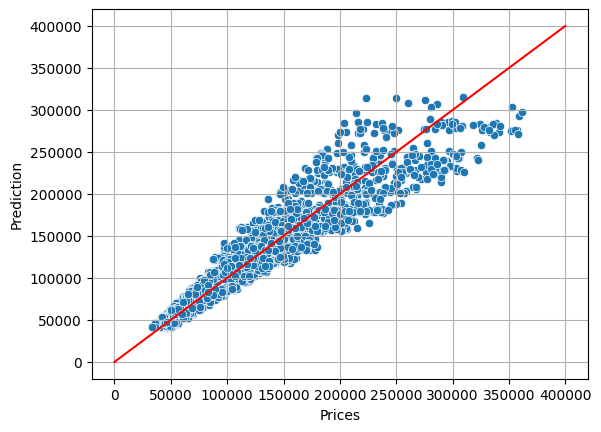

In [54]:
sns.scatterplot(x=y_test, y= y_pred) # Comprobamos valores predichos contra conocidos
plt.plot([0,400000],[0,400000],'red') # Si los valores coincidiesen con esta recta significa que no habría error en las predicciones
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Prediction')

Distribución absoluta del error

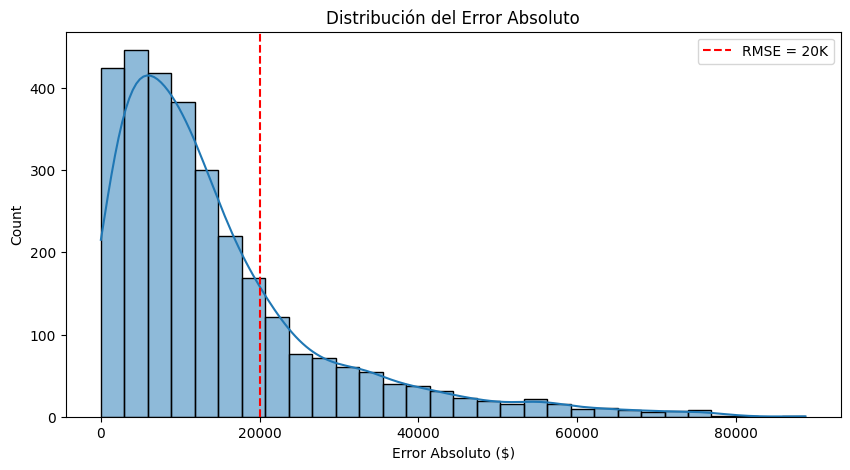

In [66]:
error_absoluto = np.abs(y_test - y_pred)
plt.figure(figsize=(10,5))
sns.histplot(error_absoluto, bins=30, kde=True)
plt.axvline(20000, color='red', linestyle='--', label='RMSE = 20K')
plt.title('Distribución del Error Absoluto')
plt.xlabel('Error Absoluto ($)')
plt.legend()
plt.show()

Distribución relativa del error

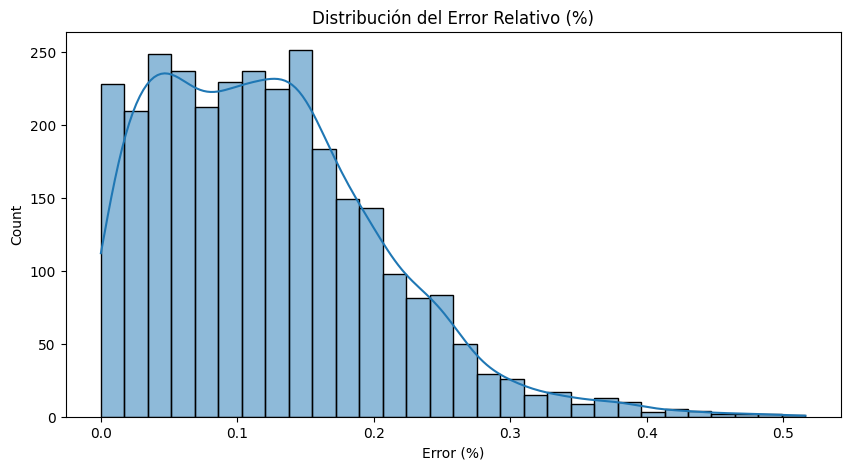

In [ ]:
error_relativo = error_absoluto/y_test      # y_test = valores reales
plt.figure(figsize=(10,5))
sns.histplot(np.abs(y_test - y_pred)/y_test, bins=30, kde=True)
plt.title('Distribución del Error Relativo (%)')
plt.xlabel('Error (%)')
plt.show()

In [65]:
np.abs(y_test - y_pred).describe(percentiles=[.25, .5, .75, .9, .95, .99])

count     3000.000000
mean     14527.671255
std      13816.368850
min          5.150779
25%       5123.229387
50%      10570.344433
75%      18900.493148
90%      33187.760157
95%      44040.051712
99%      66447.456327
max      88811.454474
Name: salary_usd, dtype: float64

In [62]:
import optuna

def objective(trial):
    # Hiperparámetros a optimizar (elige 4 o 5)
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = LGBMRegressor(**params)
    score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=3)
    return -np.mean(score)

# Crea el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) 

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(study.best_params)

# Entrena el modelo final
best_model = LGBMRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en test: {rmse:.2f}")

[I 2025-06-25 17:44:06,607] A new study created in memory with name: no-name-f4d94a91-678f-49b7-a541-f83872a6caee
[I 2025-06-25 17:44:07,174] Trial 0 finished with value: 20505.910908848255 and parameters: {'n_estimators': 469, 'learning_rate': 0.2640880496948872, 'num_leaves': 230, 'max_depth': 4, 'min_child_samples': 49}. Best is trial 0 with value: 20505.910908848255.
[I 2025-06-25 17:44:09,155] Trial 1 finished with value: 21585.846699215923 and parameters: {'n_estimators': 679, 'learning_rate': 0.22060951870022727, 'num_leaves': 299, 'max_depth': 11, 'min_child_samples': 28}. Best is trial 0 with value: 20505.910908848255.
[I 2025-06-25 17:44:11,005] Trial 2 finished with value: 20508.73385380345 and parameters: {'n_estimators': 783, 'learning_rate': 0.06560046895235336, 'num_leaves': 197, 'max_depth': 15, 'min_child_samples': 76}. Best is trial 0 with value: 20505.910908848255.
[I 2025-06-25 17:44:11,937] Trial 3 finished with value: 20854.950331084405 and parameters: {'n_estimat

Mejores hiperparámetros:
{'n_estimators': 259, 'learning_rate': 0.17758112267999474, 'num_leaves': 276, 'max_depth': 3, 'min_child_samples': 85}
RMSE en test: 20046.99
